## 2. 의사결정 나무(Decision Tree)

### 2.0 의사결정 나무 개요
용어
- Root node : 처음 시작하는 마디  
- Leaf node : 끝 마디  
- Edge : 연결 선  
- Depth : 깊이(최장으로 연결된 질문의 수)

장점
- 데이터 스케일에 영향을 받지 않는다.  
- 특히, 데이터 내에 이진 특성과 연속적 특성이 혼합되어 있어도 무관하다.  
- 결정트리 모델이 어떻게 훈련되었는지 경로로 해석이 가능하다. 즉, 설명력이 좋다.

단점
- 가지치기를 하더라도 과대적합이 되는 경향이 있다.  
- 모델의 일반화 성능이 좋지 않다.

매개변수 튜닝
- max_depth : 최대 가지치기 수  
- min_samples_split : 내부 노드를 분할하는데 필요한 최소 샘플 수  
- min_samples_leaf : 리프 노드에 있어야 하는 최소 샘플 수


### 2.1 의사결정나무(분류)

#### 2.1.1 개념

가. 성장단계
+ 각 마디에서 적절한 최적의 분리규칙(splitting rule)을 찾아서 나무를 성장시키는 과정으로 적절한 정지규칙(stopping rule) 을 만족하면 중단한다.
+ 분리규칙을 설정하는 분리기준(splitting criterion)은 이산형 종속변수, 연속형 종속변수에 따라 다르다.
+ 범주형 종속변수
    + 지니지수를 감소시켜주는 예측변수와 그 때의 최적 분리에 의해서 자식마디를 형성  
    + 엔트로피지수가 가장 작은 예측변수와 이 때의 최적 분리에 의해 자식마디를 형성

나. 가지치기 단계
+ 나무의 크기를 모형의 복잡도로 볼 수 있음
+ 과적합 방지를 위함
+ max_depth : int, default = None
  - 트리의 최대 깊이
+ min_samples_split : int or float, default = 2
  - 내부 노드를 분할하는데 필요한 최소 샘플 수
+ min_samples_leaf : int or float, default = 1
  - 리프노드에 있어야 하는 최소 샘플 수
+ criterion : {"gini", "entropy"}, default = "gini"
  - 분할할 때 사용할 함수
+ splitter : {"best", "random"}, default = "best"
  + 분할방법
    + best : 분할 시 가장 좋은 노드 선택
    + random : 임의적으로 노드 선택
+ ccp_alphanon-negative : float, default = 0.0
  - pruning(가지치기) 에 가용하는 파라미터
  - 최소비용 - 복잡성 정리에 사용되는 복잡성 매개변수
  - ccp_alpha 보다 작은 비용-복잡성을 가진 서브트리 중 가장 비용-복잡성이 큰 트리를 선택함
  - default 로 할 경우 pruning 은 수행되지 않음

__예시__

 sklearn.tree.DecisionTreeClassifier(*, criterion = 'gini', splitter = 'best', max_depth = None,
 min_samples_split = 2, min_samples_leaf = 1, max_features = None, random_state = None, ccp_alpha = 0.0)


#### 2.1.2 DecisionTreeClassifier(예제)
credit 데이터의 train 데이터로 credit.rating(기간 내 대출 상환 여부)을 분류하는 의사결정 나무 모델 만들어라

In [14]:
import pandas as pd
import numpy as np

# 데이터 업로드
credit = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/data/credit_final.csv')
credit.columns = credit.columns.str.replace('.', '_')

# 결측치 확인
# credit.info() # 결측치 없음

# 독립변수, 종속변수 분리
X = credit.drop(['credit_rating'], axis = 1)
y = credit.credit_rating

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 훈련, 테스트 셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# 의사결정나무 모델링
dt_clf = DecisionTreeClassifier()

# 모델 학습
dt_clf.fit(X_train, y_train)

print('train accuracy :', dt_clf.score(X_train, y_train))
print('test accuracy :', dt_clf.score(X_test, y_test))

# 예측
y_pred = dt_clf.predict(X_test)
y_pred

train accuracy : 1.0
test accuracy : 0.6866666666666666


array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], d

      pred_T  pred_F
T[0]      43      49
F[1]      45     163
precision score : 0.7688679245283019
f1 score : 0.7761904761904762
recall score : 0.7836538461538461
roc_auc score : 0.6255225752508361


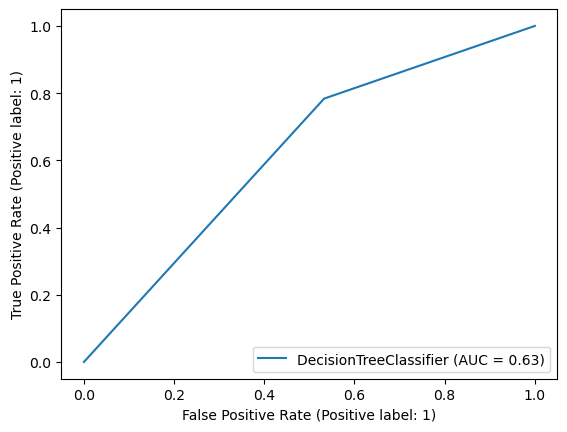

              precision    recall  f1-score   support

           0       0.49      0.47      0.48        92
           1       0.77      0.78      0.78       208

    accuracy                           0.69       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.68      0.69      0.68       300



In [29]:
# 모델 성능지표
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# 오차행렬
print(pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['T[0]', 'F[1]'], columns = ['pred_T', 'pred_F']))

# 지표
print('precision score :', precision_score(y_test, y_pred))
print('f1 score :', f1_score(y_test, y_pred))
print('recall score :', recall_score(y_test, y_pred))
print('roc_auc score :', roc_auc_score(y_test, dt_clf.predict_proba(X_test)[:,1]))

# ROC cuve 시각화
RocCurveDisplay.from_estimator(dt_clf, X_test, y_test)
plt.show()

# 분류표
print(classification_report(y_test, y_pred))

#### 2.1.3 가지치기 (pruning)

##### 주요 매개변수 조정

In [30]:
dt_clf.get_depth()

16

In [38]:
# gridsearch 로 최적의 파라미터 찾기
from sklearn.model_selection import GridSearchCV
dt_clf = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth' : np.arange(2, 16, 1), 'min_samples_leaf' : np.arange(1, 20, 1)}
grid_dt_clf = GridSearchCV(dt_clf, param_grid)
grid_dt_clf.fit(X_train, y_train)

print('최적의 파라미터 :',grid_dt_clf.best_estimator_)

최적의 파라미터 : DecisionTreeClassifier(max_depth=7, min_samples_leaf=9, random_state=42)


In [39]:
dt_clf = DecisionTreeClassifier(max_depth=7, min_samples_leaf=9, random_state=42)
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

[오차행렬]
      pred_T  pred_F
T[0]      38      54
F[1]      30     178

[모델 성능지표]
precision score : 0.7672413793103449
f1 score : 0.8090909090909091
recall score : 0.8557692307692307
roc_auc score : 0.7224080267558528

[ROC Curve 시각화]


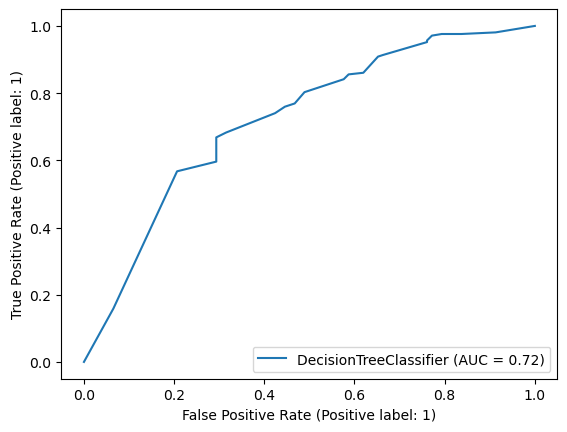

[분류표]
              precision    recall  f1-score   support

           0       0.56      0.41      0.47        92
           1       0.77      0.86      0.81       208

    accuracy                           0.72       300
   macro avg       0.66      0.63      0.64       300
weighted avg       0.70      0.72      0.71       300



In [42]:
# 모델 성능지표
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# 오차행렬
print('[오차행렬]')
print(pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['T[0]', 'F[1]'], columns = ['pred_T', 'pred_F']))
print()

# 지표
print('[모델 성능지표]')
print('precision score :', precision_score(y_test, y_pred))
print('f1 score :', f1_score(y_test, y_pred))
print('recall score :', recall_score(y_test, y_pred))
print('roc_auc score :', roc_auc_score(y_test, dt_clf.predict_proba(X_test)[:,1]))
print()

# ROC cuve 시각화
print('[ROC Curve 시각화]')
RocCurveDisplay.from_estimator(dt_clf, X_test, y_test)
plt.show()

# 분류표
print('[분류표]')
print(classification_report(y_test, y_pred))

[결과 해석]
+ 과적합을 막고, 최적의 분류 모델을 찾기 위해 GridsearchCV 사용
+ max_depth = 7, min_samples_leaf = 9 가 최적의 파라미터로 나옴
+ 결과로 roc_auc_score 가 0.71로 준수하다고 볼 수 없다.
+ 다른 모델을 통해 정확도를 향상시킬 방안을 찾아봐야 함.

### 2.2 의사결정나무 (회귀)

#### 2.2.1 개념

> sklearn.tree.DecisionTreeRegressor


+ 연속형 목표변수
> 분산분석에서 F 통계량 : p 값이 가장 작은 예측변수와 그 때의 최적분리에 의해 자식마디를 형성  
> 분산의 감소량 : 분산의 감소량을 최대화하는 기준의 최적분리에 의해서 자식마디를 형셩

+ criterion : {"squared_error", "friedman_mse", "absolute_error", "poisson"}, default = "squared_error"
  + 분할할 때 사용할 함수

+ splitter : {"best", "random"}, default = "best"
  + 분할방법
    + best : 분할 시 가장 좋은 노드 선택
    + random : 임의적으로 노드 선택

+ max_depth : int, default = None
  - 트리의 최대 깊이

+ min_samples_split : int or float, default = 2
  - 내부 노드를 분할하는데 필요한 최소 샘플 수

- min_samples_leaf : int or float, default = 1
  - 리프노드에 있어야 하는 최소 샘플 수

- max_features : int or float or {'auto', 'sqrt', 'log2'}, default = None
  - 최상의 분할을 찾을 때 고려할 함수
    - auto : 제곱근으로 함
    - sqrt : 제곱근
    - log2 : 로그

- random_state
  - 추정량의 임의성을 제어함

+ ccp_alphanon-negative : float, default = 0.0
  + pruning 에 사용하는 파라미터
  + 최소비용 - 복잡성 정리에 사용되는 복잡성 매개변수
  + ccp_alpha 보다 작은 비용-복잡성을 가진 서브트리 중 가장 비용-복잡성이 큰 트리를 선택함
  + default 로 할 경우 pruning 은 수행되지 않음


> sklearn.tree.DesicionTreeRegressor(*, criterion = 'squared_error', splitter = 'best', max_depth = None, min_samples_split = 2, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = None, random_state = None, max_leaf_nodes = None, min_impurity_decrease = 0.0, ccp_alpha = 0.0)


#### 2.2.2 DecisionTreeRegressor(예제)
kc_house_data 로 train 데이터로 price 를 예측하는 모델을 만들어라

In [44]:
import pandas as pd
kc_house = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/data/kc_house_data.csv')
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,standard,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,standard,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,standard,0,3,6,770,0,1933,0,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,standard,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,standard,0,3,8,1680,0,1987,0,1800,7503


In [51]:
X = kc_house.drop(['id', 'date', 'price'], axis = 1)
y = kc_house['price']

# 범주형 변수 원핫 벡터로 표현하기, drop_first로 다중 공선성을 제거하면서 표현
X = pd.get_dummies(data = X, columns = ['waterfront'], drop_first=True)

# X.info() # 결측치 없음
X = X.astype(float) # T, F 로 되어있는것을 1, 0으로 변경

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,waterfront_standard
0,3.0,1.00,1180.0,5650.0,1.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,1340.0,5650.0,1.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,1690.0,7639.0,1.0
2,2.0,1.00,770.0,10000.0,1.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,2720.0,8062.0,1.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,1360.0,5000.0,1.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,1800.0,7503.0,1.0


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

y_pred = dt_reg.predict(X_test)

print('train r2 score :', dt_reg.score(X_train, y_train))
print('test r2 score :', dt_reg.score(X_test, y_test))

mse = mean_squared_error(y_test, y_pred)
print('mse :', mse)
print('rmse :', np.sqrt(mse))

train r2 score : 0.9993439722718961
test r2 score : 0.5209912629268233
mse : 69152829975.46649
rmse : 262969.25671162875


In [61]:
dt_reg.get_depth()

39

In [62]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth' : np.arange(1, 40, 2), 'min_samples_leaf' : np.arange(2, 40, 2)}
dt_reg = DecisionTreeRegressor()
grid_dt_reg = GridSearchCV(dt_reg, param_grid)
grid_dt_reg.fit(X_train, y_train)

print('최적의 파라미터 :',grid_dt_reg.best_params_)

최적의 파라미터 : {'max_depth': 9, 'min_samples_leaf': 4}


In [63]:
dt_reg = DecisionTreeRegressor(max_depth=9, min_samples_leaf=4)
dt_reg.fit(X_train, y_train)

y_pred = dt_reg.predict(X_test)

print('train r2 score :', dt_reg.score(X_train, y_train))
print('test r2 score :', dt_reg.score(X_test, y_test))

mse = mean_squared_error(y_test, y_pred)
print('mse :', mse)
print('rmse :', np.sqrt(mse))

train r2 score : 0.7989456723085262
test r2 score : 0.627049241258044
mse : 53841607495.697426
rmse : 232037.94408608568


[결과 해석]
+ R2 값이 0.62로 모델이 전체 데이터의 62%를 설명할 수 있다.
+ RMSE 값은 232037로 집값의 평균적인 차이는 232037만큼 난다고 할 수 있다.

### 2.3 의사결정나무(시각화)
iris 데이터의 Speicies 를 분류하는 의사결정나무 분석을 실시하고 오분류표를 만들어보자

In [120]:
# 데이터 준비
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, roc_auc_score, classification_report

iris = load_iris()
iris
X = iris.data
y = iris.target

# 훈련셋, 테스트셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

# 모델 생성
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

# 오분류표
print('[오분류표]')
print(pd.DataFrame(confusion_matrix(y_test, y_pred), index = iris.target_names, 
                   columns = ['pred-' + x for x in iris.target_names]))

# 모델 성능 지표
print()
print('[모델 성능 지표]')
print('precision_score :', precision_score(y_test, y_pred, average= 'weighted'))
print('recall_score :', recall_score(y_test, y_pred, average= 'weighted'))
print('Accuracy :', dt_clf.score(X_test, y_test))
print('roc_auc_score :', roc_auc_score(y_test , dt_clf.predict_proba(X_test), multi_class='ovr'))

# 분류리포트
print()
print('[분류리포트]')
print(classification_report(y_test, y_pred))

[오분류표]
            pred-setosa  pred-versicolor  pred-virginica
setosa               15                0               0
versicolor            0               12               3
virginica             0                0              15

[모델 성능 지표]
precision_score : 0.9444444444444444
recall_score : 0.9333333333333333
Accuracy : 0.9333333333333333
roc_auc_score : 0.9500000000000001

[분류리포트]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.80      0.89        15
           2       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



[결과 해석]
+ 훈련셋으로 학습한 모델에 대한 테스트셋의 분류 정확도는 약 93% 이다.

In [ ]:
# !pip install pydotplus

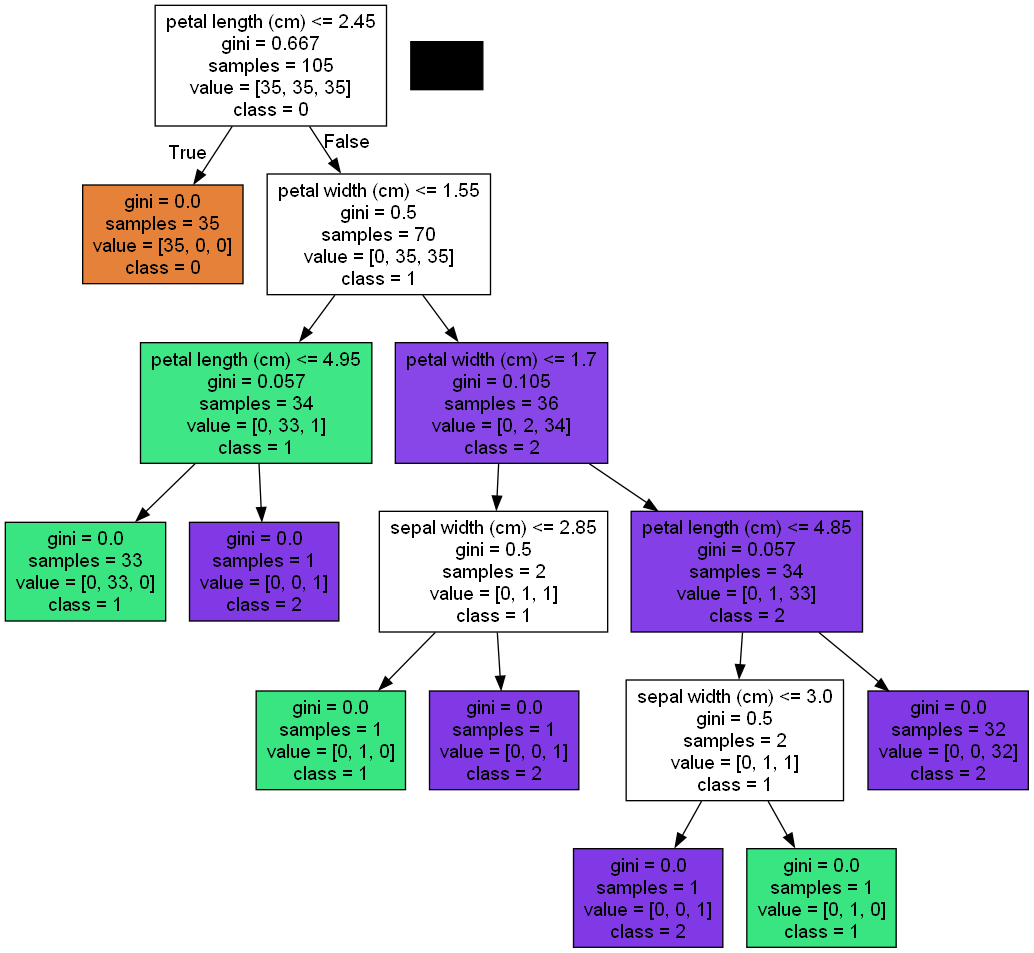

In [126]:
# 의사결정나무 시각화
from sklearn import tree
import pydot
import pydotplus
from IPython.display import Image

# 시각화 라이브러리에 삽입해야 하는 변수 생성
# 원본 데이터의 변수 이름을 추출하고 타겟변수 이름을 종속변수의 클래스 수 만큼 0,1,2로 설정
feature_names = iris.feature_names
target_names = np.array(['0', '1', '2'])

dt_dot_data = tree.export_graphviz(dt_clf, feature_names= feature_names,
                                   class_names=target_names, filled = True, max_depth = 5)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

Image(dt_graph.create_png())